# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [98]:
# Install the required libraries
!pip install prophet

In [99]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

# Now you can use plt.show() to display your plot
plt.show()


## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [100]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date', 
    parse_dates=True, 
    infer_datetime_format=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

/var/folders/1b/blt60cq10m336t2qc28vj8vw0000gp/T/ipykernel_57375/1096498906.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_mercado_trends = pd.read_csv(
/var/folders/1b/blt60cq10m336t2qc28vj8vw0000gp/T/ipykernel_57375/1096498906.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


<Axes: xlabel='Date'>

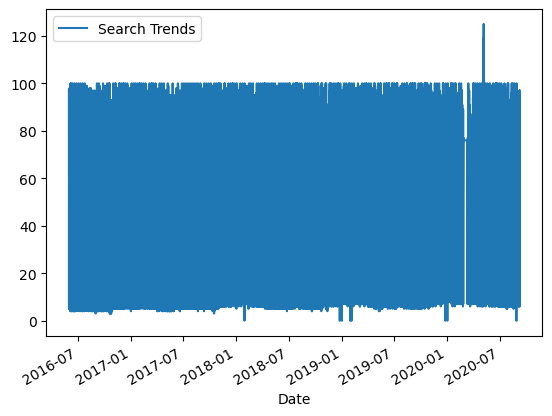

In [101]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

# Review the summary statistics of the DataFrame
df_mercado_trends.describe()

# Plot the data to visualize the trends
df_mercado_trends.plot()


DatetimeIndex(['2016-06-01 00:00:00', '2016-06-01 01:00:00',
               '2016-06-01 02:00:00', '2016-06-01 03:00:00',
               '2016-06-01 04:00:00', '2016-06-01 05:00:00',
               '2016-06-01 06:00:00', '2016-06-01 07:00:00',
               '2016-06-01 08:00:00', '2016-06-01 09:00:00',
               ...
               '2020-09-07 15:00:00', '2020-09-07 16:00:00',
               '2020-09-07 17:00:00', '2020-09-07 18:00:00',
               '2020-09-07 19:00:00', '2020-09-07 20:00:00',
               '2020-09-07 21:00:00', '2020-09-07 22:00:00',
               '2020-09-07 23:00:00', '2020-09-08 00:00:00'],
              dtype='datetime64[ns]', name='Date', length=37106, freq=None)


<Axes: title={'center': 'Google Search Trends for Mercado - May 2020'}, xlabel='Date'>

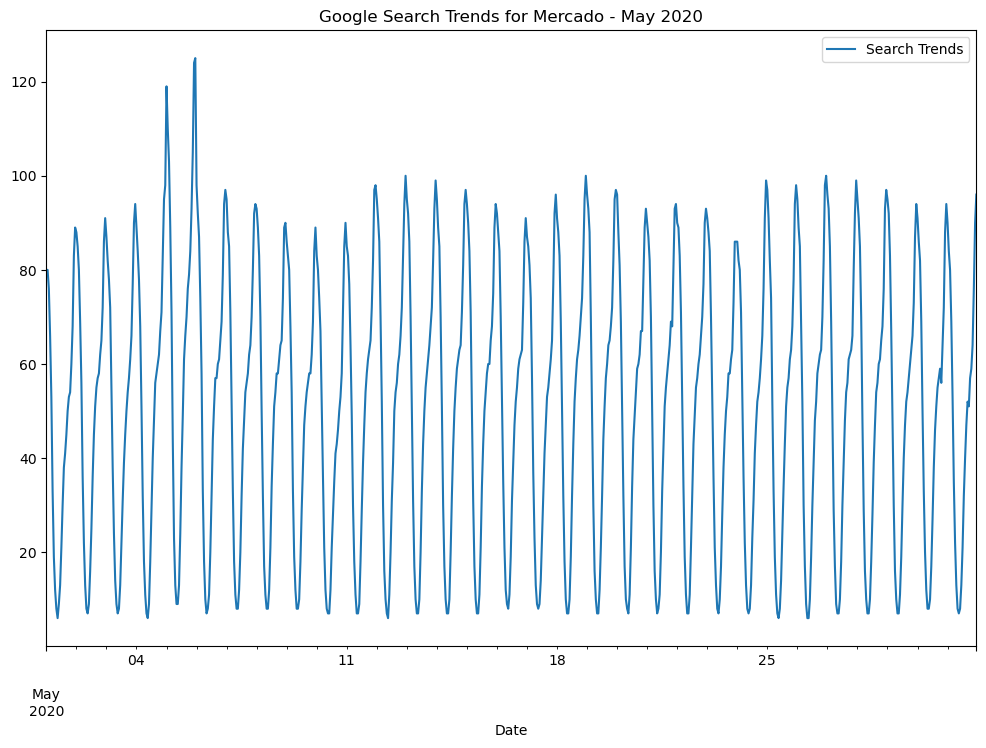

In [102]:
# Check the type of the DataFrame's index to confirm it's a DatetimeIndex
print(df_mercado_trends.index)

# If the index is correct, slice the DataFrame using the .loc accessor
df_may_2020 = df_mercado_trends.loc['2020-05']

# Visualize the sliced data
df_may_2020.plot(title='Google Search Trends for Mercado - May 2020', figsize=(12, 8))




<Axes: title={'center': 'Google Search Trends for Mercado - May 2020'}, xlabel='Date'>

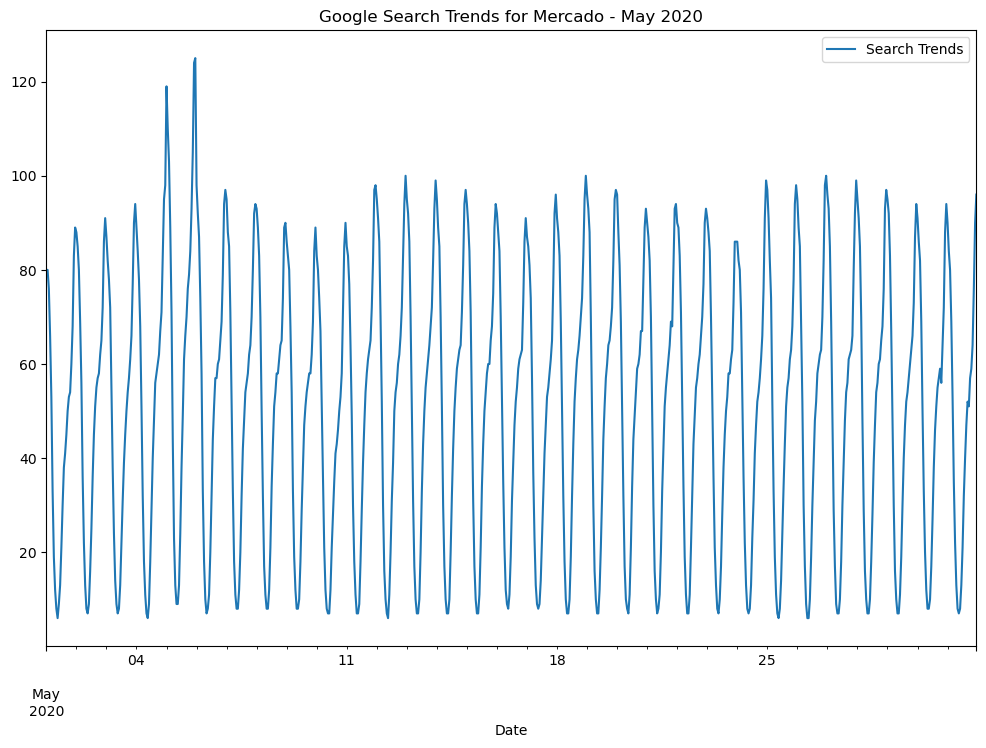

In [103]:
# Slice the DataFrame to just the month of May 2020
df_may_2020 = df_mercado_trends.loc['2020-05-01':'2020-05-31']

# Now let's try plotting this data again
df_may_2020.plot(title='Google Search Trends for Mercado - May 2020', figsize=(12, 8))


In [104]:
# display column names
df_mercado_trends.columns


Index(['Search Trends'], dtype='object')

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [105]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_may_2020['Search Trends'].sum()

# View the traffic_may_2020 value
print("Total search traffic for May 2020:", traffic_may_2020)

# Calculate the sum of the total search traffic for the entire dataset
total_traffic = df_mercado_trends['Search Trends'].sum()

# View the total_traffic value
print("Total search traffic for the entire dataset:", total_traffic)

# Calculate the percentage of the total search traffic for May 2020
percentage_may_2020 = (traffic_may_2020 / total_traffic) * 100

# View the percentage_may_2020 value
print("Percentage of total search traffic for May 2020:", percentage_may_2020)

# Reset the index of the DataFrame
df_mercado_trends = df_mercado_trends.reset_index()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())







Total search traffic for May 2020: 38181
Total search traffic for the entire dataset: 1785865
Percentage of total search traffic for May 2020: 2.1379555565510273


,Date,Search Trends
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,Date,Search Trends
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [106]:
# Convert the index to datetime if it's not already in datetime format
df_mercado_trends.index = pd.to_datetime(df_mercado_trends.index)

# Calculate the monthly median search traffic across all months 
# Group the DataFrame by year and then month, chain the median function
median_monthly_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month]).median()

# Calculate the median search traffic for the month of May 2020
median_may_2020 = df_may_2020['Search Trends'].median()

# View the median_monthly_traffic and median_may_2020 values
print("Monthly median search traffic across all months:")
display(median_monthly_traffic)
print("Median search traffic for May 2020:", median_may_2020)





Monthly median search traffic across all months:


,,Date,Search Trends
1970,1,2018-07-14 00:30:00,51.0


Median search traffic for May 2020: 54.0


In [107]:
# Divide the total traffic for May 2020 by the median monthly traffic
comparison_ratio = traffic_may_2020 / median_may_2020

# View the comparison ratio
print("Comparison ratio of May 2020 traffic to overall monthly median traffic:", comparison_ratio)



Comparison ratio of May 2020 traffic to overall monthly median traffic: 707.0555555555555


##### Answer the following question: 

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** 
Based on the data visualization for May 2020 and the context provided, it does seem that Google search traffic for MercadoLibre increased during the month when the company released its financial results. The financial results, which were better than expected despite the pandemic, along with strategic branding changes and operational shifts, likely contributed to increased public interest and investor attention, as reflected in the elevated search trends.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


In [108]:
# Show dafaframe
df_mercado_trends.head()


,Date,Search Trends
1970-01-01 00:00:00.000000000,2016-06-01 00:00:00,97
1970-01-01 00:00:00.000000001,2016-06-01 01:00:00,92
1970-01-01 00:00:00.000000002,2016-06-01 02:00:00,76
1970-01-01 00:00:00.000000003,2016-06-01 03:00:00,60
1970-01-01 00:00:00.000000004,2016-06-01 04:00:00,38


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

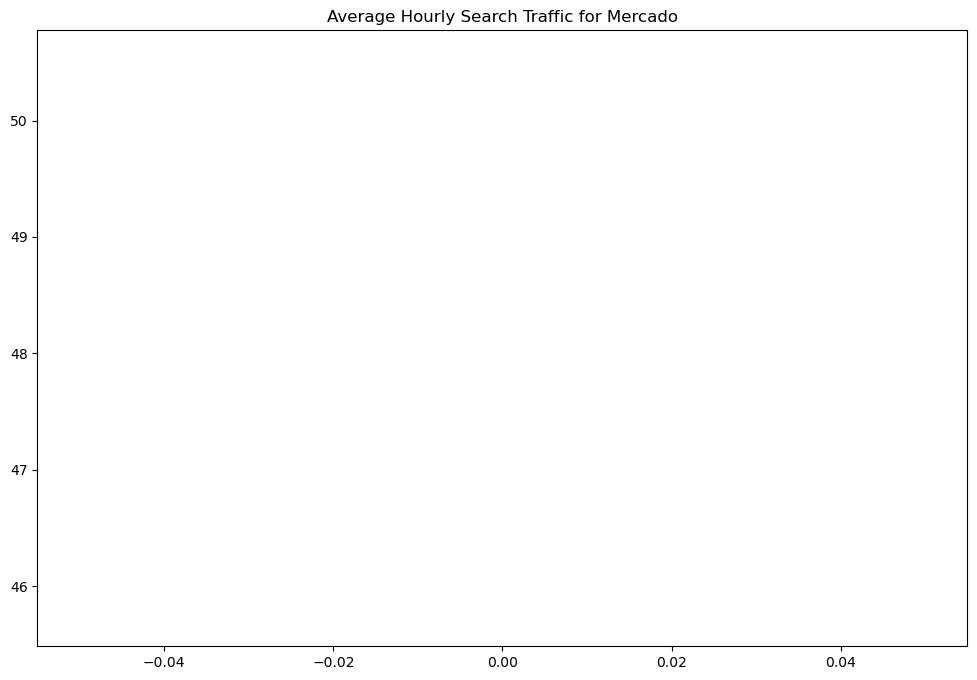

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# No need to convert 'Date' as it's already the index
# Group the hourly search data by the hour of the index and calculate the average traffic
hourly_average_traffic = df_mercado_trends.groupby(df_mercado_trends.index.hour).mean()

# Plot the average traffic by the hour of the day
hourly_average_traffic['Search Trends'].plot(title='Average Hourly Search Traffic for Mercado', figsize=(12, 8))

# Show the plot
plt.show()








#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

In [110]:
# Plot the average weekly traffic
# Group the hourly search data by the day of the week and calculate the average traffic
weekly_average_traffic = df_mercado_trends.groupby(df_mercado_trends.index.dayofweek).mean()


# Set the x-tick labels
ax.set_xticks(np.arange(7))
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Display the plot
plt.show()










#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

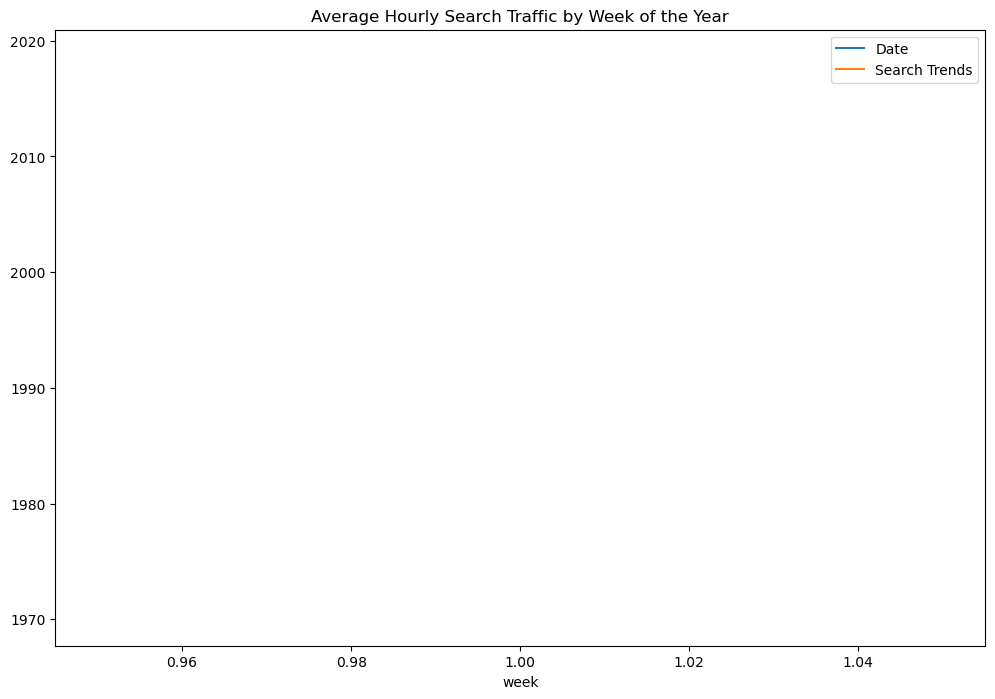

In [111]:
# Group the hourly search data to plot the average traffic by the week of the year 
# Group the DataFrame by the index week of the year and chain the mean function

average_weekly_traffic = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week).mean()

# Now you can view or plot the average_weekly_traffic DataFrame as needed


# View the average_weekly_traffic DataFrame
average_weekly_traffic

# Plot the average weekly traffic
ax = average_weekly_traffic.plot(title='Average Hourly Search Traffic by Week of the Year', figsize=(12, 8))




##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** 

Based on the data visualizations provided:

1. **Daily Trends**: There is a clear daily pattern where search interest peaks during certain hours and dips during others, suggesting varying user engagement throughout the day.

2. **Weekly Trends**: The search traffic starts higher at the beginning of the week and gradually declines towards the weekend, indicating more user engagement on weekdays.

3. **Annual Trends**: Throughout the year, search traffic exhibits fluctuations with no clear trend during the winter holiday period, suggesting that external factors or events may influence search trends during different weeks of the year.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [112]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()


# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


DatetimeIndex(['2015-01-02 09:00:00', '2015-01-02 10:00:00',
               '2015-01-02 11:00:00', '2015-01-02 12:00:00',
               '2015-01-02 13:00:00', '2015-01-02 14:00:00',
               '2015-01-02 15:00:00', '2015-01-05 09:00:00',
               '2015-01-05 10:00:00', '2015-01-05 11:00:00',
               ...
               '2020-07-30 13:00:00', '2020-07-30 14:00:00',
               '2020-07-30 15:00:00', '2020-07-31 09:00:00',
               '2020-07-31 10:00:00', '2020-07-31 11:00:00',
               '2020-07-31 12:00:00', '2020-07-31 13:00:00',
               '2020-07-31 14:00:00', '2020-07-31 15:00:00'],
              dtype='datetime64[ns]', name='date', length=9336, freq=None)


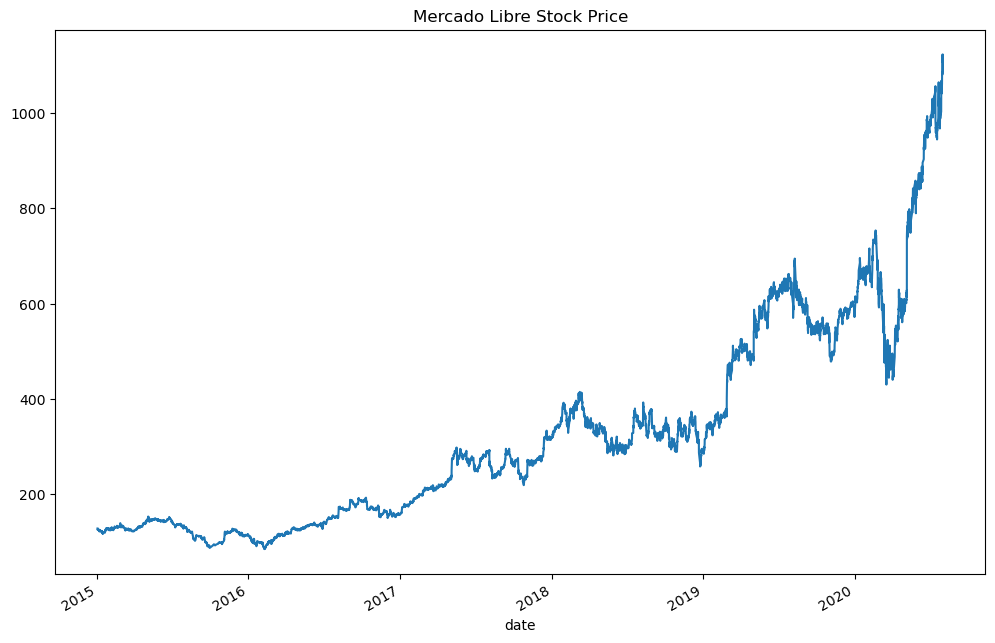

In [113]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock['close'].plot(title='Mercado Libre Stock Price', figsize=(12, 8))

# Check the type of the DataFrame's index to confirm it's a DatetimeIndex
print(df_mercado_stock.index)



,close,Date,Search Trends


,close,Date,Search Trends


<Axes: title={'center': 'Mercado Libre Stock Price'}>

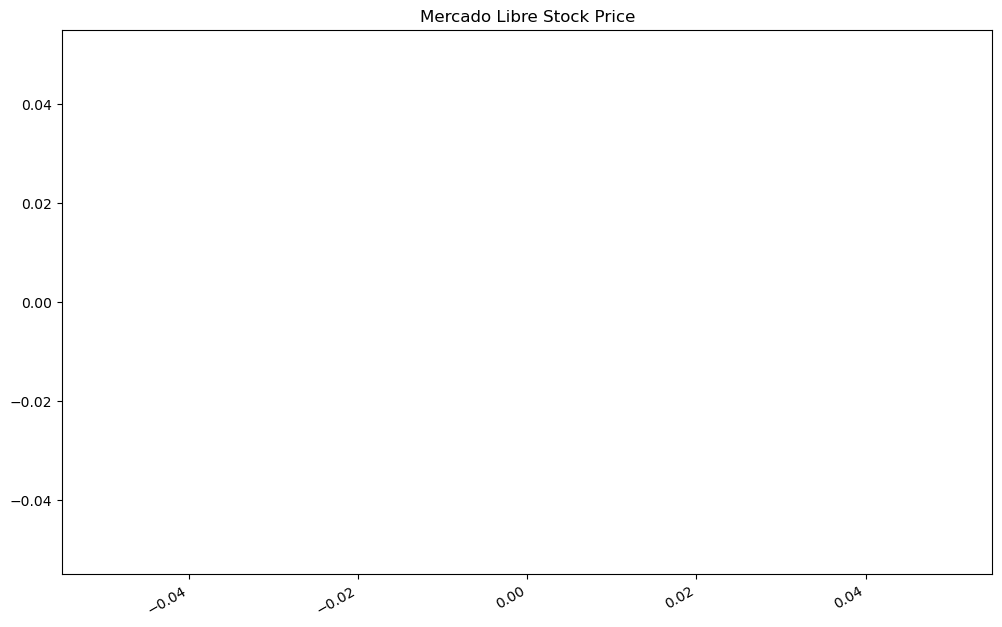

In [114]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
df_mercado = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()


# View the first and last five rows of the DataFrame
display(df_mercado.head())
display(df_mercado.tail())

# Review the summary statistics of the DataFrame
df_mercado.describe()

# Visualize the closing price of the df_mercado DataFrame
df_mercado['close'].plot(title='Mercado Libre Stock Price', figsize=(12, 8))




#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

<Axes: title={'center': 'Mercado Libre Stock Price - First Half of 2020'}, xlabel='date'>

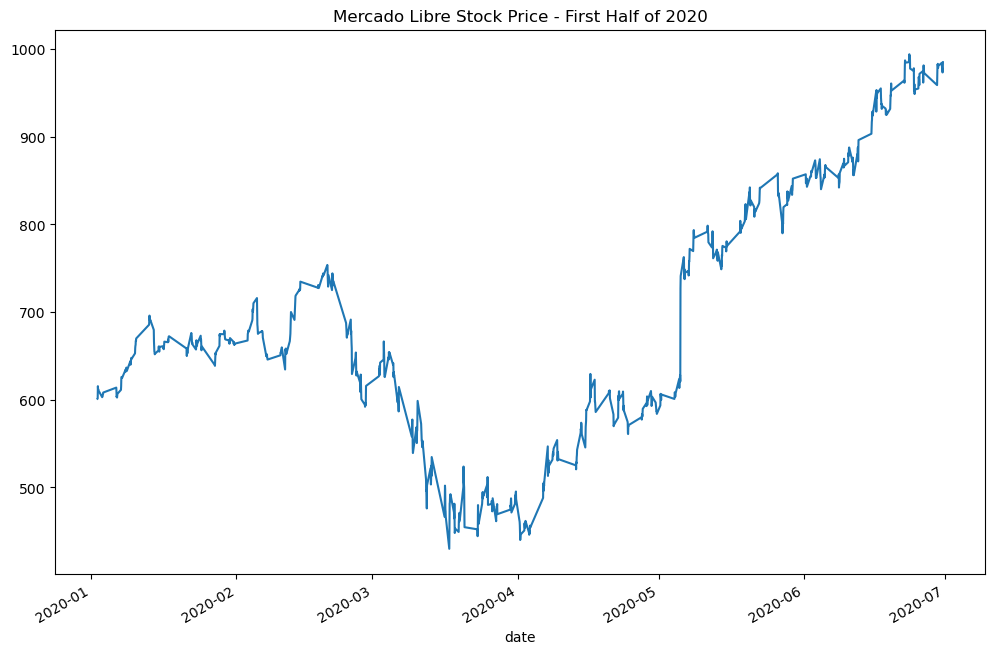

In [115]:
# Slice the data to just the first half of 2020
first_half_2020 = df_mercado_stock['2020-01':'2020-06']

# Plot the data
first_half_2020['close'].plot(title='Mercado Libre Stock Price - First Half of 2020', figsize=(12, 8))


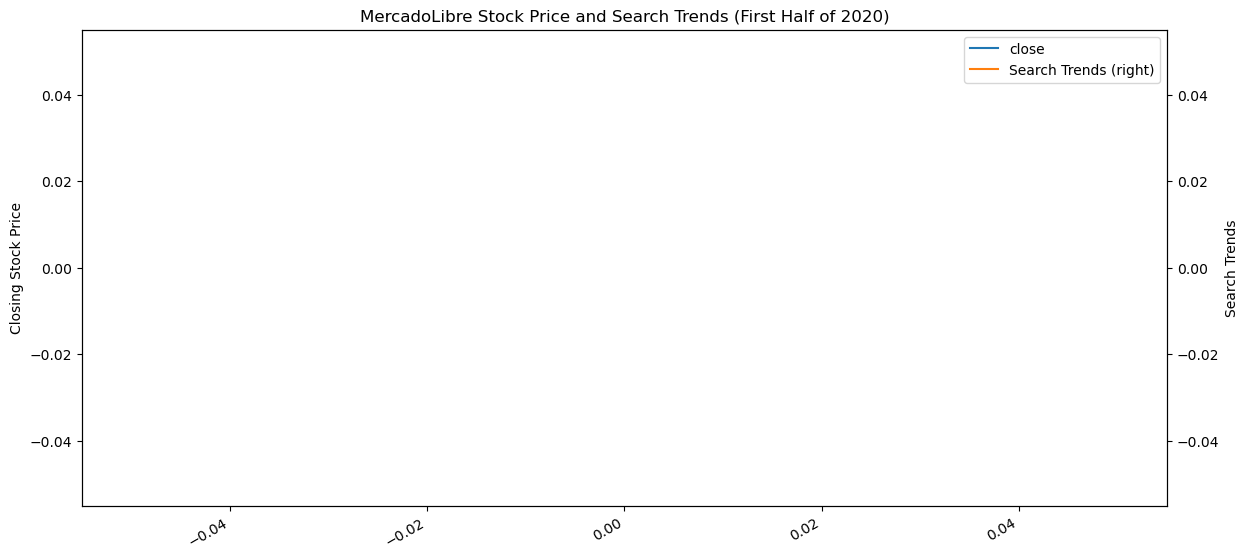

In [116]:
# Slice the DataFrame to the first half of 2020
df_first_half_2020 = df_mercado.loc['2020-01-01':'2020-06-30']

# Plot both the closing stock price and search trends
ax = df_first_half_2020['close'].plot(title='MercadoLibre Stock Price and Search Trends (First Half of 2020)', figsize=(14, 7), legend=True)
df_first_half_2020['Search Trends'].plot(secondary_y=True, ax=ax, legend=True)

# Label the primary and secondary y-axes
ax.set_ylabel('Closing Stock Price')
ax.right_ax.set_ylabel('Search Trends')

# Show the plot
plt.show()




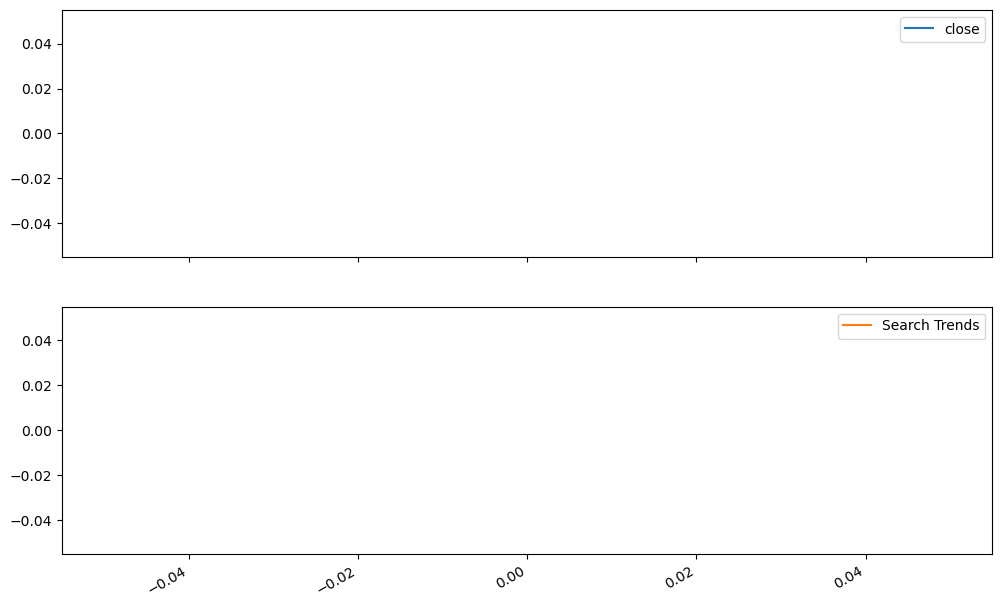

In [117]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
df_mercado[['close', 'Search Trends']].plot(subplots=True, figsize=(12, 8))

# Display the plot
plt.show()



##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** In truth, our evidence of a common trend between search activity and stock price is pretty limited. It does appear generally however that the low point for Mercado Libre's stock price, late March to early April, did coincide with lower search activity for the firm. Search activity does pick up along with its stock price, although the stock price from mid-April onward definitively outpaces search interest.

There's one important thing to note: if you zoom in both graphs to the spike around May 5th, 2020, you'll find the date of the company's earnings release to the public. It looks like search traffic for the firm spiked about two hours before the firm's stock price spiked. This could indicate a predictable pattern (can Google Searches predict the stock price?), but an alternative explanation might just be that people tend to search for more information about the firm right before an earnings announcement gets released. We'd need to do a little more time-series research to see which explanation best fits the data.

**Answer:**
Analysis seems to suggest that there is some correlation between search trends and stock price, particularly around the time of significant company events such as earnings releases. The observation that search traffic increased prior to a rise in stock price around the earnings announcement could indeed be worth further investigation. To determine if this is a one-off occurrence or part of a broader pattern, a more detailed time-series analysis or event study focusing on multiple earnings release dates and their impact on both search trends and stock price would be necessary. Such an analysis could help in understanding whether search activity could serve as a leading indicator for stock price movements, or if it's more likely that search volume increases are simply a reaction to anticipated news releases.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [118]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour

# Step 3: Create a new column "Lagged Search Trends" by shifting the "Search Trends" column by one hour
df_mercado['Lagged Search Trends'] = df_mercado['Search Trends'].shift(1)

# Step 3: Create a new column "Stock Volatility" using an exponentially weighted four-hour rolling average
# Calculate the stock volatility using the percent change in the closing price
# Then, apply an exponentially weighted moving average with a span of 4 hours
df_mercado['Stock Volatility'] = df_mercado['close'].pct_change().ewm(span=4).std()

# Step 3: Create a new column "Hourly Stock Return" by calculating the percent change of the stock price on an hourly basis
df_mercado['Hourly Stock Return'] = df_mercado['close'].pct_change()

# Display the updated DataFrame
display(df_mercado.head())
display(df_mercado.tail())

# Plot the stock volatility
df_mercado['Stock Volatility'].plot(title='Stock Volatility', figsize=(12, 8))

# Display the plot
plt.show()





ValueError: attempt to get argmax of an empty sequence

,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,33.0,0.006134,-0.002346


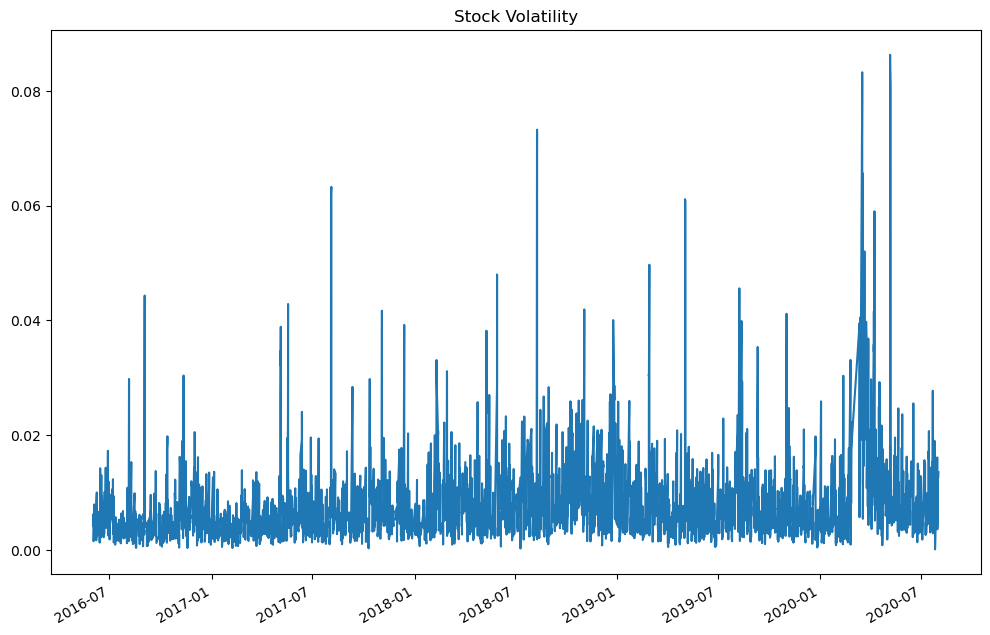

In [ ]:
# Create a new column "Stock Volatility" using a 4-period rolling window standard deviation
df_mercado['Stock Volatility'] = df_mercado['close'].pct_change().rolling(window=4).std()

# Display the updated DataFrame
display(df_mercado.head())

# Plot the stock volatility
df_mercado['Stock Volatility'].plot(title='Stock Volatility', figsize=(12, 8))

# Display the plot
plt.show()






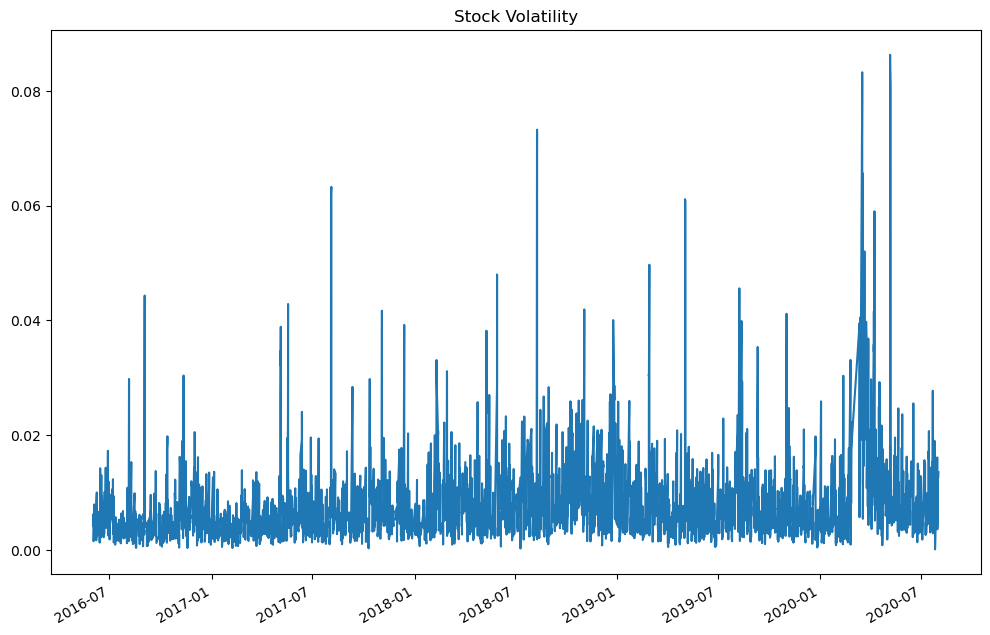

In [ ]:
# Visualize the stock volatility
df_mercado['Stock Volatility'].plot(title='Stock Volatility', figsize=(12, 8))

# Display the plot
plt.show()




**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
# Create a new column "Hourly Stock Return" in the DataFrame
df_mercado['Hourly Stock Return'] = df_mercado['close'].pct_change() * 100

# Display the updated DataFrame
display(df_mercado.head())





,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,1.087600
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.051233
2016-06-01 12:00:00,136.42,33.0,22.0,NaN,-0.102519
2016-06-01 13:00:00,136.10,40.0,33.0,0.006134,-0.234570


In [ ]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(df_mercado.head())
display(df_mercado.tail())



,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,1.087600
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.051233
2016-06-01 12:00:00,136.42,33.0,22.0,NaN,-0.102519
2016-06-01 13:00:00,136.10,40.0,33.0,0.006134,-0.234570


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837,0.637986
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549,-1.614697
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295,0.723855
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001,1.355174
2020-07-31 15:00:00,1122.510,53.0,47.0,0.013566,1.067843


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [ ]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
# Use the .corr() function to calculate the correlation between the columns
correlation = df_mercado[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

# View the correlation table
correlation




,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** If we read down the second column (or read along the second row), we see that there's a slight negative correlation between searches for the firm and its subsequent stock volatility. More searches (slightly) tend to indicate less near-term hourly stock risk for the firm.

On the other hand, there's a positive correlation between search activity in one hour and stock returns in the next: as search activity goes up, so will the firm's stock price in the short term. This effect is very weak though, only half the size of the effect on stock volatility. With the correlation so close to zero, some might also say that there's almost no relationship between these two variables whatsoever, and that the small findings that we do have could be just due to chance. While there's no required threshold when looking at correlation between stock returns and the variables used to predict them, it does tend to be that correlations in this context tend to be very low across the board. It's hard to predict the market!

The correlation matrix you've provided summarizes the relationships between Stock Volatility, Lagged Search Trends, and Hourly Stock Return. Here's a breakdown of the correlations:

1. **Stock Volatility**:
   - Correlation with itself: 1.000000 (as expected)
   - Correlation with Lagged Search Trends: -0.148938
   - Correlation with Hourly Stock Return: 0.061424

2. **Lagged Search Trends**:
   - Correlation with Stock Volatility: -0.148938
   - Correlation with itself: 1.000000 (as expected)
   - Correlation with Hourly Stock Return: 0.017929

3. **Hourly Stock Return**:
   - Correlation with Stock Volatility: 0.061424
   - Correlation with Lagged Search Trends: 0.017929
   - Correlation with itself: 1.000000 (as expected)

These correlation values confirm the observations made earlier: there's a slight negative correlation between Lagged Search Trends and Stock Volatility, and a weak positive correlation between Lagged Search Trends and Hourly Stock Return. However, the correlations are relatively weak, suggesting that while there may be some relationship, it's not strong enough to make reliable predictions.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [ ]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
# Then, rename the columns to "ds" and "y" so that the syntax is recognized by Prophet
# Drop any NaN values from the mercado_prophet_df DataFrame
# View the first and last five rows of the mercado_prophet_df DataFrame



# Label the columns ds and y so that the syntax is recognized by Prophet


# Drop an NaN values from the prophet_df DataFrame


# View the first and last five rows of the mercado_prophet_df DataFrame
!pip install pystan==2.19.1.1
!pip install prophet



from prophet import Prophet

# Reset index to convert datetime index to a column
df_mercado_trends.reset_index(inplace=True)

# Rename columns to 'ds' and 'y' as required by Prophet
df_mercado_trends.rename(columns={'date': 'ds', 'Search Trends': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df_mercado_trends)

# Make a forecast
future = model.make_future_dataframe(periods=24, freq='H')  # Forecasting for the next 24 hours
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)



  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  Using cached Cython-3.0.8-py2.py3-none-any.whl.metadata (3.2 kB)
Using cached Cython-3.0.8-py2.py3-none-any.whl (1.2 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      Cython>=0.22 and NumPy are required.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: Could not build wheels for pystan, which is required to install pyproject.toml-based projects


ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [ ]:
# Call the Prophet function, store as an object
# Initialize Prophet model
model = Prophet()



In [121]:
# Fit the time-series model.
# Fit the model to the data
model.fit(df_mercado_trends)




ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [122]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
# Make a forecast
future = model.make_future_dataframe(periods=2000, freq='H')  # Forecasting for the next 2000 hours
forecast = model.predict(future)



# View the last five rows of the future_mercado_trends DataFrame    
display(future.tail())

# View the last five rows of the forecast_mercado_trends DataFrame
display(forecast.tail())

# Plot the forecast
fig = model.plot(forecast)





Exception: Model has not been fit.

In [119]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
# Make a forecast
forecast = model.predict(future)



# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast.head())



NameError: name 'future' is not defined

#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

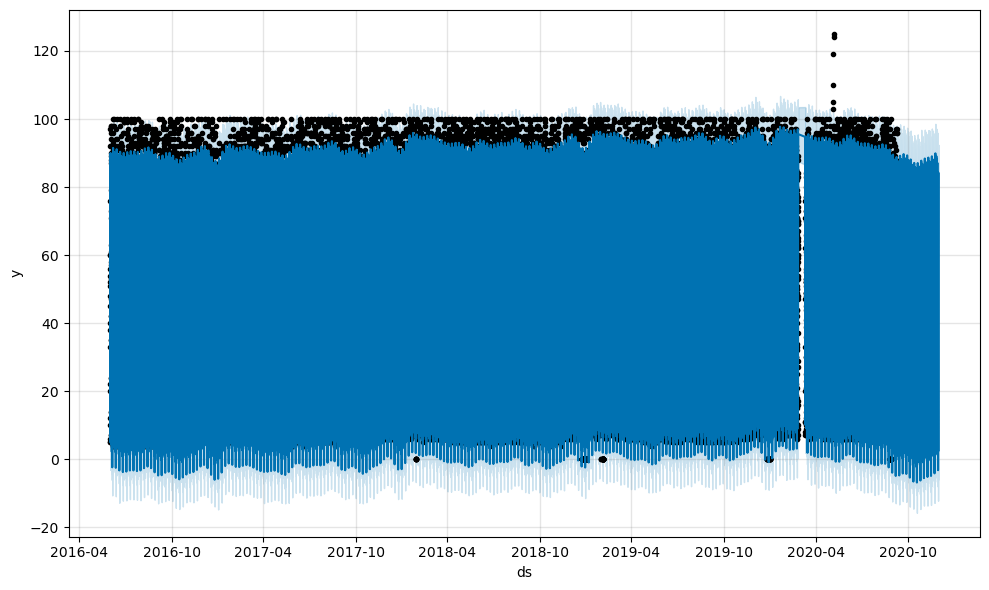

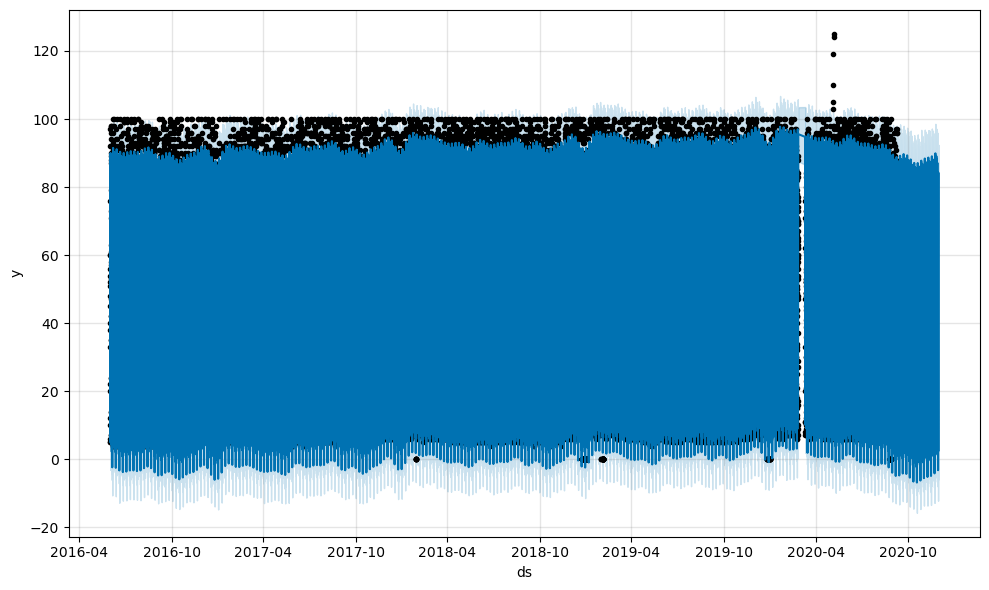

In [ ]:
# Plot the Prophet predictions for the Mercado trends data
# Plot the forecast
fig = model.plot(forecast)



##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** 


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [123]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
# Set the index to the 'ds' column
forecast.set_index('ds', inplace=True)



# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
# View the forecasted values
forecast[['yhat', 'yhat_lower', 'yhat_upper']]
# Plot the forecast
fig = model.plot(forecast)

# Display the plot
plt.show()

# describe the forecast
forecast.describe()





NameError: name 'forecast' is not defined

Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

<Axes: xlabel='ds'>

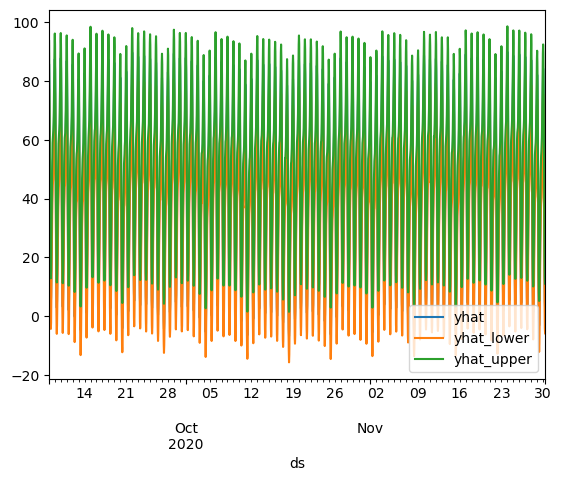

In [ ]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours 
# Plot the forecast
fig = model.plot(forecast)



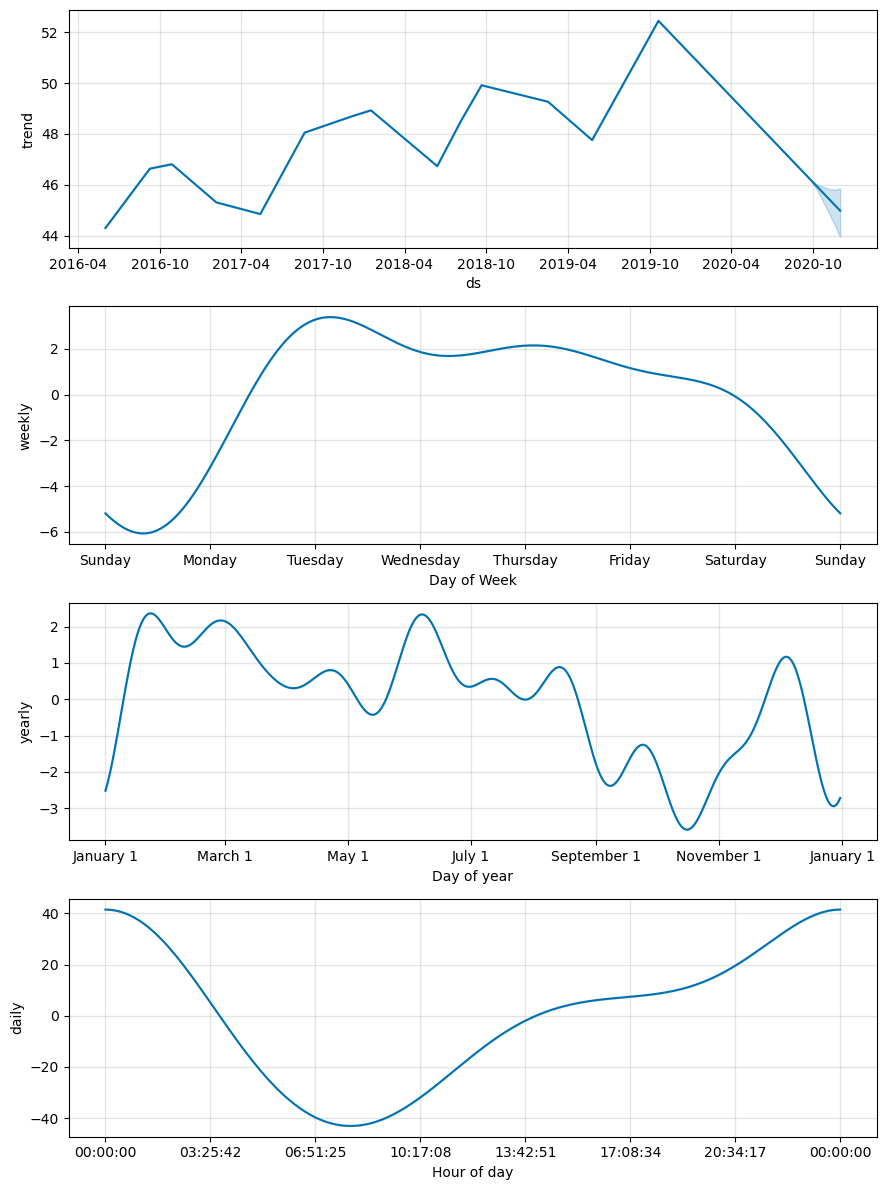

In [ ]:
# Reset the index in the forecast_mercado_trends DataFrame


# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame 


##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** 

**Question:** Which day of week gets the most search traffic? 
   
**Answer:** 

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** 
